In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [5]:
df = pd.read_csv(
    "../data/Library_Usage.csv",
    na_values="none")

In [6]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True


## Wie viele junge Erwachsene und Senioren möchten auf welchem Weg benachrichtigt werden?

In [7]:
df['Patron Type Definition'].value_counts()

Adult                  271588
Juvenile                58767
Senior                  47366
Teen                    40340
Welcome                 10587
Digital Access Card      3707
Teacher Card             3161
Staff                     808
Retired Staff             209
At User Adult             128
Library By Mail           117
Visitor                   111
Bibliocommons             109
At User Senior             76
At User Welcome            14
At User Teen               10
At User Juvenile            9
Business                    8
Name: Patron Type Definition, dtype: int64

In [8]:
Mail = df.loc[
    (df['Patron Type Definition'] == 'Juvenile') |
    (df['Patron Type Definition'] == 'Senior')
]

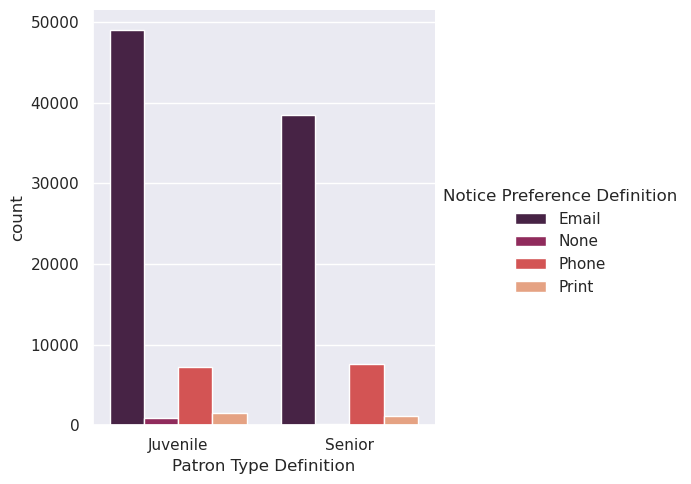

In [9]:
sns.catplot(x = 'Patron Type Definition', kind = 'count', hue = 'Notice Preference Definition', data = Mail, aspect = 1, palette=sns.color_palette('rocket', 4))

In [10]:
pd.crosstab(
    Mail['Notice Preference Definition'],
    Mail['Patron Type Definition'])

Patron Type Definition,Juvenile,Senior
Notice Preference Definition,,
Email,49063,38529
None,885,105
Phone,7280,7577
Print,1539,1155


## Mittelwert der Ausleihen von Teenagern, jungen Erwachsenen, Erwachsenen und Senioren

In [11]:
df['Total Checkouts'].sum()

70412694

In [12]:
df['Total Checkouts'].mean()

161.08505542019836

In [14]:
print(df.groupby('Patron Type Definition').mean())

                        Patron Type Code  Total Checkouts  Total Renewals  \
Patron Type Definition                                                      
Adult                                0.0       125.744945       68.161053   
At User Adult                      100.0       382.320312      149.460938   
At User Juvenile                   101.0        83.222222       34.555556   
At User Senior                     103.0       390.750000       83.828947   
At User Teen                       102.0        33.100000       12.700000   
At User Welcome                    104.0         9.357143        1.785714   
Bibliocommons                       17.0         0.009174        0.000000   
Business                            11.0        56.000000       55.125000   
Digital Access Card                 16.0         3.634475        0.611276   
Juvenile                             1.0       106.273997       57.794834   
Library By Mail                     12.0       342.598291      125.623932   

In [53]:

df["Mittelwert_Checkouts"] =(df['Total Checkouts'].mean())

In [42]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Average Checkouts per Year,Mittelwert_Checkouts
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True,NaN,161.085055
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True,NaN,161.085055
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True,NaN,161.085055
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True,NaN,161.085055
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True,NaN,161.085055


In [34]:
Mittelwert = df.loc[
    (df['Patron Type Definition'] == 'Teen') |
    (df['Patron Type Definition'] == 'Juvenile') |
    (df['Patron Type Definition'] == 'Adult') |
    (df['Patron Type Definition'] == 'Senior')
]

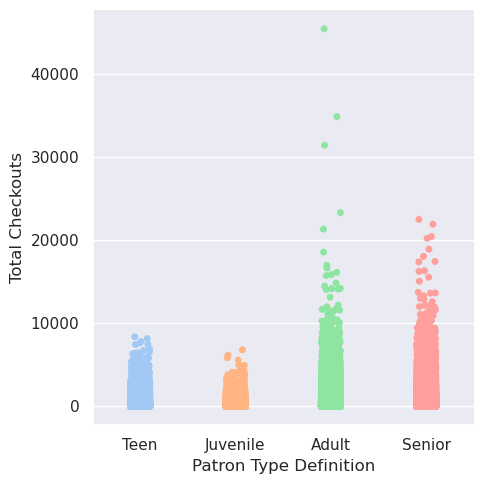

In [29]:
order =['Teen', 'Juvenile', 'Adult', 'Senior']

plt = sns.catplot(y='Total Checkouts', x='Patron Type Definition', data= Mittelwert, order =order, aspect = 1, palette=sns.color_palette('pastel', 4))

TypeError: 'NoneType' object is not iterable

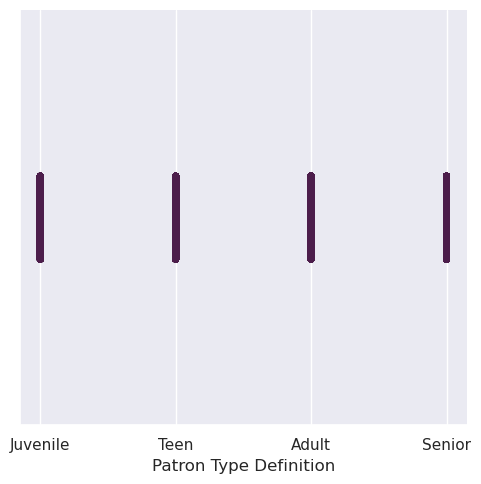

In [16]:
sns.catplot(x = 'Patron Type Definition', kind = 'strip', hue = 'Total Checkouts', data = Mittelwert, aspect = 1, palette=sns.color_palette('rocket', 4))